In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import mlab

from scipy import signal
import h5py, time


In [2]:
%matplotlib notebook

In [3]:
import sys
sys.path.append('/home/analysis_user/New_trap_code/Tools/')
import BeadDataFile

In [53]:
##Force Calibration with single freq, with xyz2

In [32]:
Year = "2020"
Month = "01"
Day = "13"
BeadNumber =1
folder = r"/data/new_trap/"+ Year + Month + Day

In [5]:
ResX=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=13+i
    SigFreq=151
    fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResX[i]=np.sqrt(xpsd[SigFreq*10])
    print(np.sqrt(xpsd[SigFreq*10]))
    #print(np.sqrt(ypsd[SigFreq*10]))
    #print(np.sqrt(zpsd[SigFreq*10]))
    

0.0034907565966789964
0.0034988302854130873
0.003501008400808456
0.0034662204444342497
0.0034182538303328806


In [6]:
ResY=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=18+i
    SigFreq=151
    fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResY[i]=np.sqrt(ypsd[SigFreq*10])    
    #print(np.sqrt(xpsd[SigFreq*10]))
    print(np.sqrt(ypsd[SigFreq*10]))
    #print(np.sqrt(zpsd[SigFreq*10]))
    

0.002799816757135983
0.002811647975927043
0.0028033722689201185
0.002786304492288798
0.002785566463786243


In [7]:
ResZ=np.arange(0, 0.5, 0.1)
for i in range(0,5):
    Ndata=23+i
    SigFreq=151
    fname = folder+"/Bead"+str(BeadNumber)+"/Discharge"+"/Discharge_%d.h5" % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000
    data_det=signal.detrend(data)

    xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
    zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
    ResZ[i]=np.sqrt(zpsd[SigFreq*10])    
    print(np.sqrt(zpsd[SigFreq*10]))
    

8681.792588302631
8621.90176416928
8939.612194962863
8904.938888012295
8853.139450758885


In [8]:
q=11
V=10
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)*np.sqrt(5)
print(F)

5.956417077831592e-15


In [9]:
AveX=np.average(ResX)
AveY=np.average(ResY)
AveZ=np.average(ResZ)
BtoFx=F/AveX
BtoFy=F/AveY
BtoFz=F/AveZ
print(BtoFx)
print(BtoFy)
print(BtoFz)

1.7140699949609718e-12
2.1293134509182023e-12
6.768442735649983e-19


In [12]:
##code for Transfer Function

In [15]:
##X preparation
NdataX=4
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_X_%d.h5" % NdataX
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res=50000
data_det=signal.detrend(data)
fbase=7

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0X=np.sqrt(xpsd[fbase*10])
XnoiseX=np.sqrt(xpsd)
XnoiseY=np.sqrt(ypsd)
XnoiseZ=np.sqrt(zpsd)

No cantilever data
Error loading spinning data


In [16]:
##Y preparataion
NdataY=5
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Y_%d.h5" % NdataY
BDF = BeadDataFile.BeadDataFile(fname) 
data = BDF.xyz2 
res=50000 
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none) 
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none) 
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none) 
Noise0Y=np.sqrt(ypsd[fbase*10]) 
YnoiseX=np.sqrt(xpsd) 
YnoiseY=np.sqrt(ypsd) 
YnoiseZ=np.sqrt(zpsd)

No cantilever data
Error loading spinning data


In [17]:
##Z preparation
NdataZ=6
fname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TransFunc_Z_%d.h5" % NdataZ
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res=50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)
Noise0Z=np.sqrt(zpsd[fbase*10])
ZnoiseX=np.sqrt(xpsd)
ZnoiseY=np.sqrt(ypsd)
ZnoiseZ=np.sqrt(zpsd)

No cantilever data
Error loading spinning data


In [18]:
#Here, there is no conversion factor
q=11
V=0.65
F=(q*1.602e-19)*(V*2/8.6e-3*0.65)
Nharm=100

FnoiseXX=XnoiseX
FnoiseXY=XnoiseY
FnoiseXZ=XnoiseZ
FnoiseYX=YnoiseX
FnoiseYY=YnoiseY
FnoiseYZ=YnoiseZ
FnoiseZX=ZnoiseX
FnoiseZY=ZnoiseY
FnoiseZZ=ZnoiseZ

TFXX=np.zeros(Nharm)
TFXY=np.zeros(Nharm)
TFXZ=np.zeros(Nharm)
TFYX=np.zeros(Nharm)
TFYY=np.zeros(Nharm)
TFYZ=np.zeros(Nharm)
TFZX=np.zeros(Nharm)
TFZY=np.zeros(Nharm)
TFZZ=np.zeros(Nharm)

FreqTF=np.zeros(Nharm)
for i in range(Nharm):
    FreqTF[i]=fbase*(i+1)
    TFXX[i]=FnoiseXX[fbase*10*(i+1)]
    TFXY[i]=FnoiseXY[fbase*10*(i+1)]
    TFXZ[i]=FnoiseXZ[fbase*10*(i+1)]
    TFYX[i]=FnoiseYX[fbase*10*(i+1)]
    TFYY[i]=FnoiseYY[fbase*10*(i+1)]
    TFYZ[i]=FnoiseYZ[fbase*10*(i+1)]
    TFZX[i]=FnoiseZX[fbase*10*(i+1)]
    TFZY[i]=FnoiseZY[fbase*10*(i+1)]
    TFZZ[i]=FnoiseZZ[fbase*10*(i+1)]

In [19]:
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/TFBead%d%d%d_Bit.txt" % (NdataX,NdataY,NdataZ)

f1 = open(ofname,"a")
for i in range(Nharm):
    f1.write('%f %e %e %e %e %e %e %e %e %e\n' % (FreqTF[i],TFXX[i],TFXY[i],TFXZ[i],
                                                  TFYX[i],TFYY[i],TFYZ[i],TFZX[i],TFZY[i],TFZZ[i]))
f1.close()

In [ ]:
## Plotting the force sensitivity with transfer function compensation

In [26]:
Ndata=20
fname = folder+"/Bead"+str(BeadNumber)+"/InitialTest"+"/Data%d.h5" % Ndata
print(fname)
BDF = BeadDataFile.BeadDataFile(fname)
data = BDF.xyz2
res = 50000
data_det=signal.detrend(data)

xpsd, freqs = matplotlib.mlab.psd(data_det[0], Fs = fsamp, NFFT = res,window=mlab.window_none)
ypsd, freqs = matplotlib.mlab.psd(data_det[1], Fs = fsamp, NFFT = res,window=mlab.window_none)
zpsd, freqs = matplotlib.mlab.psd(data_det[2], Fs = fsamp, NFFT = res,window=mlab.window_none)

w0x=299.385
gx=43.798
w0y=290.541
gy=23.5191
w0z=313.163
gz=232.409

f0=151
F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

/data/new_trap/20200113/Bead1/InitialTest/Data20.h5
No electrodes data
No cantilever data


<IPython.core.display.Javascript object>


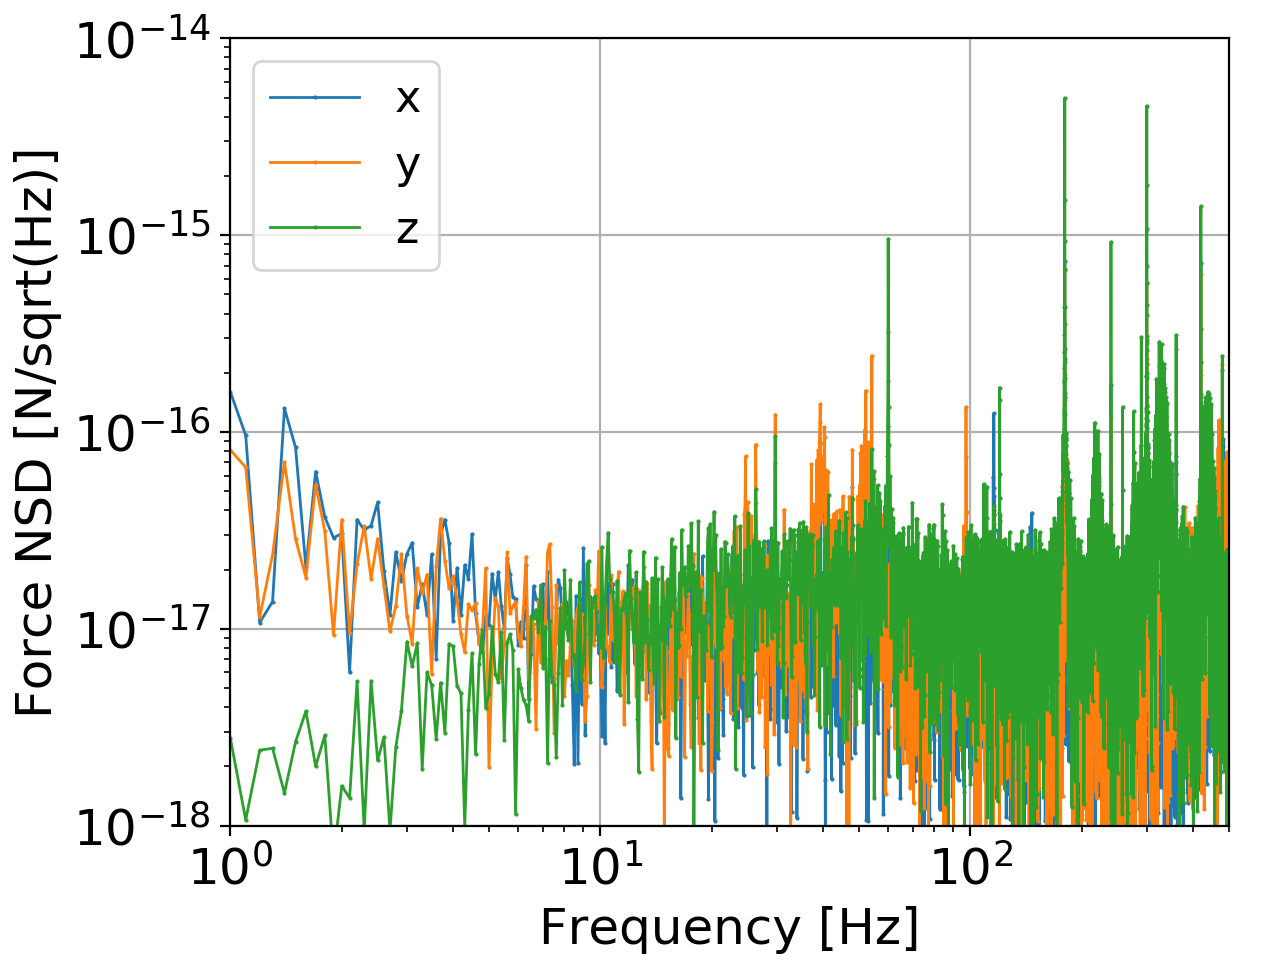

In [27]:
_,ax = plt.subplots()
plt.subplots_adjust(left=0.18, right=0.96, top=0.96, bottom=0.14)
ax.loglog(freqs, xnsd, '.-', label="x",markersize=1,linewidth=1)
ax.loglog(freqs, ynsd, '.-', label="y",markersize=1,linewidth=1)
ax.loglog(freqs, znsd, '.-', label="z",markersize=1,linewidth=1)
ax.legend(fontsize=16)
ax.set_xlabel('Frequency [Hz]', fontsize=18)
ax.set_ylabel('Force NSD [N/sqrt(Hz)]',fontsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
plt.xlim(1,500)
plt.ylim(1e-18,1e-14)
plt.grid(True)
ofname = folder+"/Bead"+str(BeadNumber)+"/TransFunc"+"/ForceSensitivity%d.png" % Ndata

plt.savefig(ofname,dpi=300)

In [73]:
##1000 Data Analysis

In [35]:
#analyzing multiple data in single number
Nint=2
Nave=3
Ndata=22
Dx=375
for k in range(0,1000):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(res/2)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=151
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    
    xphase=np.arctan(xFFT.imag/xFFT.real)
    yphase=np.arctan(yFFT.imag/yFFT.real)
    zphase=np.arctan(zFFT.imag/zFFT.real)

    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XSignal%d_%d.txt" % (Dx,Ndata,NSubData)

    Fshake=3
    f1 = open(ofname,"a")
    for i in range(1,50):
        Intx=xFFT[Fshake*10*i]
        IntNSDx=xnsd[Fshake*10*i]
        Inty=yFFT[Fshake*10*i]
        IntNSDy=ynsd[Fshake*10*i]
        Intz=zFFT[Fshake*10*i]
        IntNSDz=znsd[Fshake*10*i]

        for j in range(1,(Nint)):
            Intx+=xFFT[Fshake*10*i+j]+xFFT[Fshake*10*i-j]
            IntNSDx+=xnsd[Fshake*10*i+j]+xnsd[Fshake*10*i-j]
            Inty+=yFFT[Fshake*10*i+j]+yFFT[Fshake*10*i-j]
            IntNSDy+=ynsd[Fshake*10*i+j]+ynsd[Fshake*10*i-j]
            Intz+=zFFT[Fshake*10*i+j]+zFFT[Fshake*10*i-j]
            IntNSDz+=znsd[Fshake*10*i+j]+znsd[Fshake*10*i-j]

        AveNoiseX=0
        AveNoiseY=0
        AveNoiseZ=0
        SigAmpX=IntNSDx-AveNoiseX*(Nint*2+1)
        SigPhaX=np.angle(Intx) 
        SigAmpY=IntNSDy-AveNoiseY*(Nint*2+1)
        SigPhaY=np.angle(Inty) 
        SigAmpZ=IntNSDz-AveNoiseZ*(Nint*2+1)
        SigPhaZ=np.angle(Intz) 
        
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, SigAmpY, SigAmpZ, SigPhaX, SigPhaY, SigPhaZ))
    f1.close()

In [49]:
##Extracting Cantilever Position Data for y

In [53]:
for j in range(0,1000):
    Ndata=370
    FileN=j
    fname = r'/data/new_trap/20191204/Bead1/Shaking/Shaking%d/Shaking2_%d.h5' % (Ndata,FileN)
    BDF = BeadDataFile.BeadDataFile(fname)
    data=BDF.cant_pos
    ofname = "/data/new_trap/20191204/Bead1/Shaking/Shaking%d/CantPosY2_%d.txt" % (Ndata,FileN)
    f1 = open(ofname,"a")
    for i in  range(0,50000):
        f1.write('%f\n' % data[1][i])
    f1.close()

In [71]:
##Extracting QPD sum information

In [87]:
for j in range(26,45):
    Ndata=j
    fname = r'/home/data_transfer/data_from_windows/20190902/Bead1/Shaking/BeamProfile%d_0.h5' % Ndata
    BDF = BeadDataFile.BeadDataFile(fname)
    data=BDF.quad_sum
    ofname = "../../Results/AkioK/BeamProfile%dQuadSumY.txt" % Ndata
    f1 = open(ofname,"a")
    for i in  range(0,50000):
        f1.write('%d\n' % data[i])
    f1.close()

In [36]:
##for Noise only analysis for sensitivity. Used bin of 3*n-0.7 Hz. 
Nint=2
Nave=3
Ndata=24
Dx=377
for k in range(0,1000):
    NSubData=k
    fname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/Shaking%d_%d.h5" % (Dx,Ndata,NSubData)
    BDF = BeadDataFile.BeadDataFile(fname)
    data = BDF.xyz2
    fsamp=5000
    res=50000

    data_det=signal.detrend(data)
    x_1000=data_det[0]
    y_1000=data_det[1]
    z_1000=data_det[2]
    freqs=np.linspace(0,2500,(res/2)+1)
    
    xFFT=np.fft.rfft(x_1000)
    yFFT=np.fft.rfft(y_1000)
    zFFT=np.fft.rfft(z_1000)
    norm = np.sqrt(2 / (res* fsamp))
    xpsd = norm**2 * (xFFT * xFFT.conj()).real
    ypsd = norm**2 * (yFFT * yFFT.conj()).real
    zpsd = norm**2 * (zFFT * zFFT.conj()).real
  
    f0=151
    F0x=1/np.sqrt((f0*f0-w0x*w0x)*(f0*f0-w0x*w0x)+gx*gx*f0*f0)
    F0y=1/np.sqrt((f0*f0-w0y*w0y)*(f0*f0-w0y*w0y)+gy*gy*f0*f0)
    F0z=1/np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    xnsd=np.sqrt(xpsd)*BtoFx*F0x*np.sqrt((freqs*freqs-w0x*w0x)*(freqs*freqs-w0x*w0x)+gx*gx*freqs*freqs)
    ynsd=np.sqrt(ypsd)*BtoFy*F0y*np.sqrt((freqs*freqs-w0y*w0y)*(freqs*freqs-w0y*w0y)+gy*gy*freqs*freqs)
    znsd=np.sqrt(zpsd)*BtoFz*F0z*np.sqrt((f0*f0-w0z*w0z)*(f0*f0-w0z*w0z)+gz*gz*f0*f0)

    
    xphase=np.arctan(xFFT.imag/xFFT.real)
    yphase=np.arctan(yFFT.imag/yFFT.real)
    zphase=np.arctan(zFFT.imag/zFFT.real)

    ofname = folder+"/Bead"+str(BeadNumber)+"/Shaking"+"/Shaking%d/XNoise%d_%d.txt" % (Dx,Ndata,NSubData)

    Fshake=3
    f1 = open(ofname,"a")
    
    for i in range(1,50):
        Intx=xFFT[Fshake*10*i-7]
        IntNSDx=xnsd[Fshake*10*i-7]
        Inty=yFFT[Fshake*10*i-7]
        IntNSDy=ynsd[Fshake*10*i-7]
        Intz=zFFT[Fshake*10*i-7]
        IntNSDz=znsd[Fshake*10*i-7]

        for j in range(1,(Nint)):
            Intx+=xFFT[Fshake*10*i+j-7]+xFFT[Fshake*10*i-j-7]
            IntNSDx+=xnsd[Fshake*10*i+j-7]+xnsd[Fshake*10*i-j-7]
            Inty+=yFFT[Fshake*10*i+j-7]+yFFT[Fshake*10*i-j-7]
            IntNSDy+=ynsd[Fshake*10*i+j-7]+ynsd[Fshake*10*i-j-7]
            Intz+=zFFT[Fshake*10*i+j-7]+zFFT[Fshake*10*i-j-7]
            IntNSDz+=znsd[Fshake*10*i+j-7]+znsd[Fshake*10*i-j-7]

        AveNoiseX=0
        AveNoiseY=0
        AveNoiseZ=0
        SigAmpX=IntNSDx-AveNoiseX*(Nint*2+1)
        SigPhaX=np.angle(Intx) 
        SigAmpY=IntNSDy-AveNoiseY*(Nint*2+1)
        SigPhaY=np.angle(Inty) 
        SigAmpZ=IntNSDz-AveNoiseZ*(Nint*2+1)
        SigPhaZ=np.angle(Intz) 
        
        f1.write('%f %e %e %e %e %e %e\n' % (Fshake*i, SigAmpX, SigAmpY, SigAmpZ, SigPhaX, SigPhaY, SigPhaZ))
    f1.close()